In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd

In [4]:
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [5]:
image_size = (224,224)
batch_size = 32
channels = 3

In [6]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    r"C:\Users\NITRO V\Downloads\archive (1)\YogaPoses",
    shuffle=True,
    image_size= image_size,
    batch_size=batch_size
)

Found 5993 files belonging to 107 classes.


In [7]:
class_names = dataset.class_names
class_names

['adho mukha svanasana',
 'adho mukha vriksasana',
 'agnistambhasana',
 'ananda balasana',
 'anantasana',
 'anjaneyasana',
 'ardha bhekasana',
 'ardha chandrasana',
 'ardha matsyendrasana',
 'ardha pincha mayurasana',
 'ardha uttanasana',
 'ashtanga namaskara',
 'astavakrasana',
 'baddha konasana',
 'bakasana',
 'balasana',
 'bhairavasana',
 'bharadvajasana i',
 'bhekasana',
 'bhujangasana',
 'bhujapidasana',
 'bitilasana',
 'camatkarasana',
 'chakravakasana',
 'chaturanga dandasana',
 'dandasana',
 'dhanurasana',
 'durvasasana',
 'dwi pada viparita dandasana',
 'eka pada koundinyanasana i',
 'eka pada koundinyanasana ii',
 'eka pada rajakapotasana',
 'eka pada rajakapotasana ii',
 'ganda bherundasana',
 'garbha pindasana',
 'garudasana',
 'gomukhasana',
 'halasana',
 'hanumanasana',
 'janu sirsasana',
 'kapotasana',
 'krounchasana',
 'kurmasana',
 'lolasana',
 'makara adho mukha svanasana',
 'makarasana',
 'malasana',
 'marichyasana i',
 'marichyasana iii',
 'marjaryasana',
 'matsyasa

In [8]:
len(dataset)

188

In [9]:
for image_batch, lable_batch in dataset.take(1):
    print(image_batch.shape)
    print(lable_batch.numpy())

(32, 224, 224, 3)
[  1  29   5  18  89  48  84   8  38  85  63  77  92  68  30  89  25 105
  99  49  73  41  46   0  88  86  67  14  22  24  60  94]


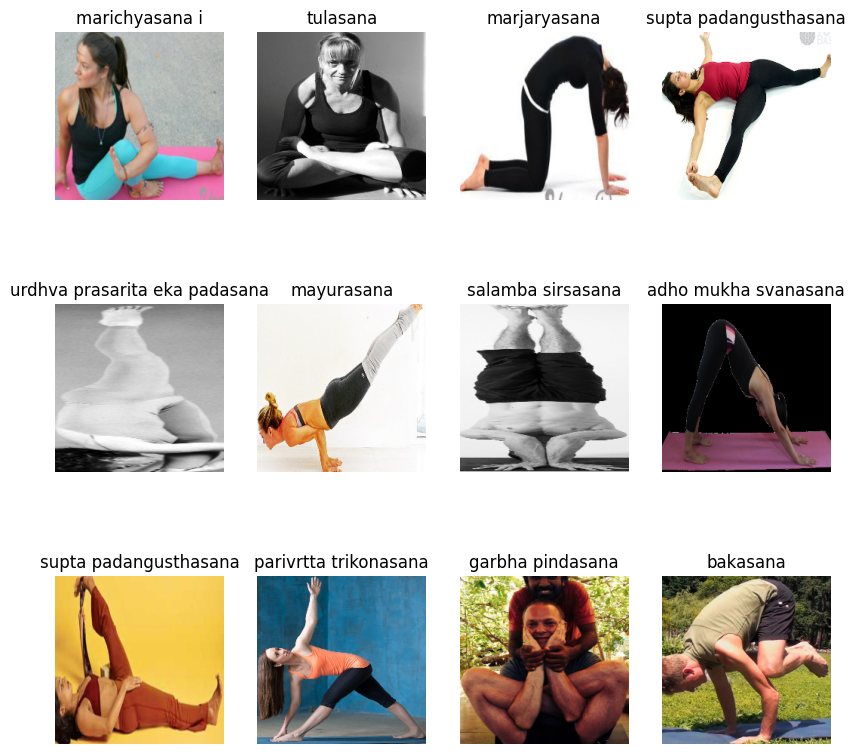

In [10]:
plt.figure(figsize=(10,10))
for image_batch, lable_batch in dataset.take(1):
    for i in range(12):
        aj = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.axis("off")
        plt.title(class_names[lable_batch[i]])

In [11]:
len(dataset)

188

In [12]:
# train dataset ==> .8
# test dataset ==> .1
# validation dataset ==> .1

In [13]:
train_ds = .8
len(dataset)*train_ds

150.4

In [14]:
train_ds = dataset.take(150)
len(train_ds)

150

In [15]:
test_ds = .1
len(dataset)*test_ds

18.8

In [16]:
rem_ds = dataset.skip(150)
len(rem_ds)

38

In [17]:
test_ds = rem_ds.take(20)
len(test_ds)

20

In [18]:
val_ds = rem_ds.skip(20)
len(val_ds)

18

In [19]:
def get_dataset_partitions_tf(ds, train_split = .8, test_split = .1, val_split = .1, shuffle = True, Shuffle_size = 10000):
    ds_size = len(dataset)
    if shuffle:
        ds = ds.shuffle(Shuffle_size, seed = 10)
        train_size = int(train_split*ds_size)
        val_size = int(val_split * ds_size)
        
        train_ds =  ds.take(train_size)
        val_ds = ds.skip(train_size).take(val_size)

        test_ds =  ds.skip(train_size).skip(val_size)

    return train_ds, test_ds, val_ds

In [20]:
train_ds, test_ds, val_ds = get_dataset_partitions_tf(dataset)

In [21]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [22]:
rescale_and_resize = tf.keras.Sequential([
    layers.Resizing(image_size, image_size),
    layers.Rescaling(1.0/255)
])

In [23]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

In [24]:
from keras.layers import Dense, Conv2D, Flatten
from keras.models import Sequential

In [25]:
from keras.layers import MaxPooling2D

In [33]:
input_shape = (224,224,3)
n_classes = 107

rescale_and_resize
data_augmentation

model = models.Sequential([
    layers.Input(shape=input_shape),

    layers.Conv2D(32, (3,3), activation='relu', input_shape = input_shape),
    layers.MaxPooling2D(pool_size = (2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(pool_size = (2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(pool_size = (2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(pool_size = (2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(pool_size = (2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(pool_size = (2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(107, activation='softmax')

])

In [34]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 52, 52, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 24, 24, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 10, 10, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 107)            │         6,955 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,219 (696.17 KB)

 Trainable params: 178,219 (696.17 KB)

 Non-trainable params: 0 (0.00 B)

ChatGPT edited ------------>

In [28]:
# import tensorflow as tf
# from tensorflow.keras import layers, models

# # Set the parameters
# image_size = 224
# n_classes = 3
# input_shape = (image_size, image_size, 3)

# # Define the rescaling and data augmentation layers
# rescale_and_resize = layers.Rescaling(1.0 / 255)
# data_augmentation = layers.RandomFlip("horizontal_and_vertical")
# data_augmentation = layers.RandomRotation(0.2)

# # Define the model
# model = models.Sequential([
#     layers.Input(shape=input_shape),
#     rescale_and_resize,
#     data_augmentation,
#     layers.Conv2D(32, (3, 3), activation='relu'),
#     layers.MaxPooling2D(pool_size=(2, 2)),
#     layers.Conv2D(64, (3, 3), activation='relu'),
#     layers.MaxPooling2D(pool_size=(2, 2)),
#     layers.Conv2D(128, (3, 3), activation='relu'),
#     layers.MaxPooling2D(pool_size=(2, 2)),
#     layers.Flatten(),
#     layers.Dense(64, activation='relu'),
#     layers.Dense(n_classes, activation='softmax')
# ])

# # Compile the model
# model.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

# # Display the model summary
# print(model.summary())


In [35]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [36]:
from keras.callbacks import EarlyStopping

In [37]:
history = model.fit(
    train_ds,
    epochs=50,  # Adjust the number of epochs as needed
    batch_size=batch_size,
    verbose=1,
    validation_data=val_ds, 
    callbacks = EarlyStopping()
)


Epoch 1/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 59s 383ms/step - accuracy: 0.0136 - loss: 5.7162 - val_accuracy: 0.0174 - val_loss: 4.6007
Epoch 2/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 53s 355ms/step - accuracy: 0.0254 - loss: 4.5541 - val_accuracy: 0.0312 - val_loss: 4.4080
Epoch 3/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 50s 334ms/step - accuracy: 0.0657 - loss: 4.3052 - val_accuracy: 0.0990 - val_loss: 4.0026
Epoch 4/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 49s 328ms/step - accuracy: 0.1140 - loss: 3.9603 - val_accuracy: 0.1806 - val_loss: 3.5802
Epoch 5/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 48s 317ms/step - accuracy: 0.1862 - loss: 3.5232 - val_accuracy: 0.2222 - val_loss: 3.2864
Epoch 6/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 48s 319ms/step - accuracy: 0.2315 - loss: 3.2165 - val_accuracy: 0.2639 - val_loss: 2.9643
Epoch 7/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 48s 321ms/step - accuracy: 0.2945 - loss: 2.9193 - val_accuracy: 0.3368 - val_loss: 2.6943
Epoch 8/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 48s 320ms/step - accuracy: 0.3450 - loss: 2

In [64]:
scores = model.evaluate(test_ds)
scores

20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - accuracy: 0.6458 - loss: 1.6243


[1.7298908233642578, 0.635937511920929]

In [65]:
history

In [66]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 150}

In [67]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [68]:
history.history['accuracy']

[0.015490894205868244,
 0.02930709719657898,
 0.07033703476190567,
 0.12581117451190948,
 0.18714673817157745,
 0.23801548779010773,
 0.2888842225074768,
 0.33640360832214355,
 0.37450283765792847,
 0.41637009382247925,
 0.4695415496826172,
 0.5135021805763245,
 0.5547414422035217,
 0.6033074855804443,
 0.639941394329071,
 0.6654804348945618]

In [69]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'training and validation loss')

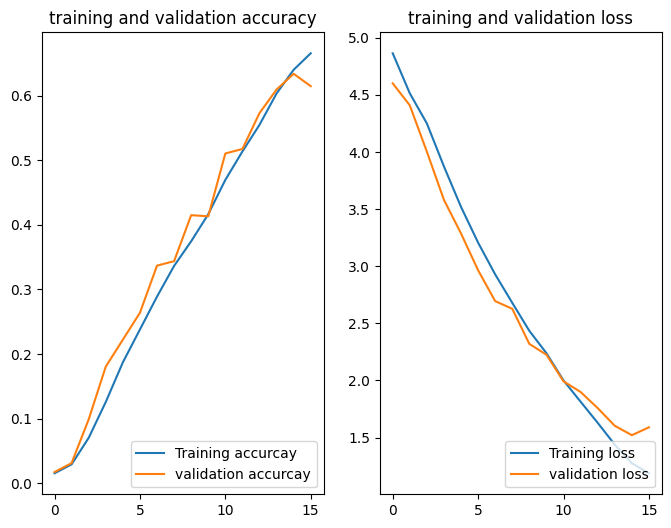

In [74]:
plt.figure(figsize = (8,6))
plt.subplot(1,2,1)
plt.plot(range(16), acc, label = "Training accurcay")
plt.plot(range(16), val_acc, label = "validation accurcay")
plt.legend(loc='lower right')
plt.title("training and validation accuracy")



plt.subplot(1,2,2)
plt.plot(range(16), loss, label = "Training loss")
plt.plot(range(16), val_loss, label = "validation loss")
plt.legend(loc='lower right')
plt.title("training and validation loss")

first image to predict
actual:   garudasana
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
predicted lable:  garudasana


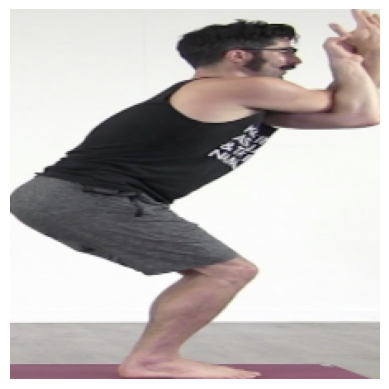

In [75]:
for image_batch, lable_batch in test_ds.take(1):
    first_image = image_batch[0].numpy().astype('uint8')
    plt.axis('off')
    first_lable = lable_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("actual:  ", class_names[first_lable])

    batch_prediction = model.predict(image_batch)
    print("predicted lable: ", class_names[np.argmax(batch_prediction[0])])

In [ ]:
np.argmax([0.01005353 ,0.01295436 ,0.0075977  ,0.00833228 ,0.0069009 ,0.00930806
 ,0.00672985 ,0.00934636 ,0.01107434 ,0.00737152 ,0.00948556 ,0.00641354
 ,0.01037119 ,0.01230495 ,0.00895551 ,0.00951588 ,0.00701862 ,0.00945261
 ,0.00716201 ,0.0094677  ,0.00874102 ,0.01268603 ,0.01001662 ,0.01128786
 ,0.01443651 ,0.00886651 ,0.00695035 ,0.00640645 ,0.01100443 ,0.01152733
 ,0.010438   ,0.0062984  ,0.00917971 ,0.00855381 ,0.00593155 ,0.01147451
 ,0.01129986 ,0.01024758 ,0.00550684 ,0.00895474 ,0.00994025 ,0.0092472
 ,0.00673936 ,0.00872781 ,0.0077678  ,0.00838942 ,0.00833421 ,0.00967538
 ,0.00809391 ,0.00954863 ,0.0108016  ,0.00761538 ,0.01100258 ,0.00505607
 ,0.01020807 ,0.00888352 ,0.01068117 ,0.00815324 ,0.00767512 ,0.01201592
 ,0.0116909  ,0.00590598 ,0.00852671 ,0.00853512 ,0.00906511 ,0.00898509
 ,0.0106136  ,0.00808791 ,0.00829941 ,0.01193968 ,0.00855971 ,0.00785171
 ,0.00918498 ,0.01166796 ,0.01004596 ,0.01034119 ,0.00985178 ,0.00704273
 ,0.01229843 ,0.01072182 ,0.00814369 ,0.00860259 ,0.00860192 ,0.00664316
 ,0.01079345 ,0.01120564 ,0.00769235 ,0.01231263 ,0.00909372 ,0.01177197
 ,0.00928426 ,0.01042115 ,0.01123673 ,0.00895676 ,0.01145402 ,0.00935732
 ,0.01139569 ,0.00933559 ,0.0104931  ,0.0097795  ,0.01183793 ,0.0082053
 ,0.00948342 ,0.00773753 ,0.00925604 ,0.01133268 ,0.00817494])

24

In [76]:
def predict (model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0) #create batch
    
    
    predictions = model.predict(img_array)

    predicted_class =class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


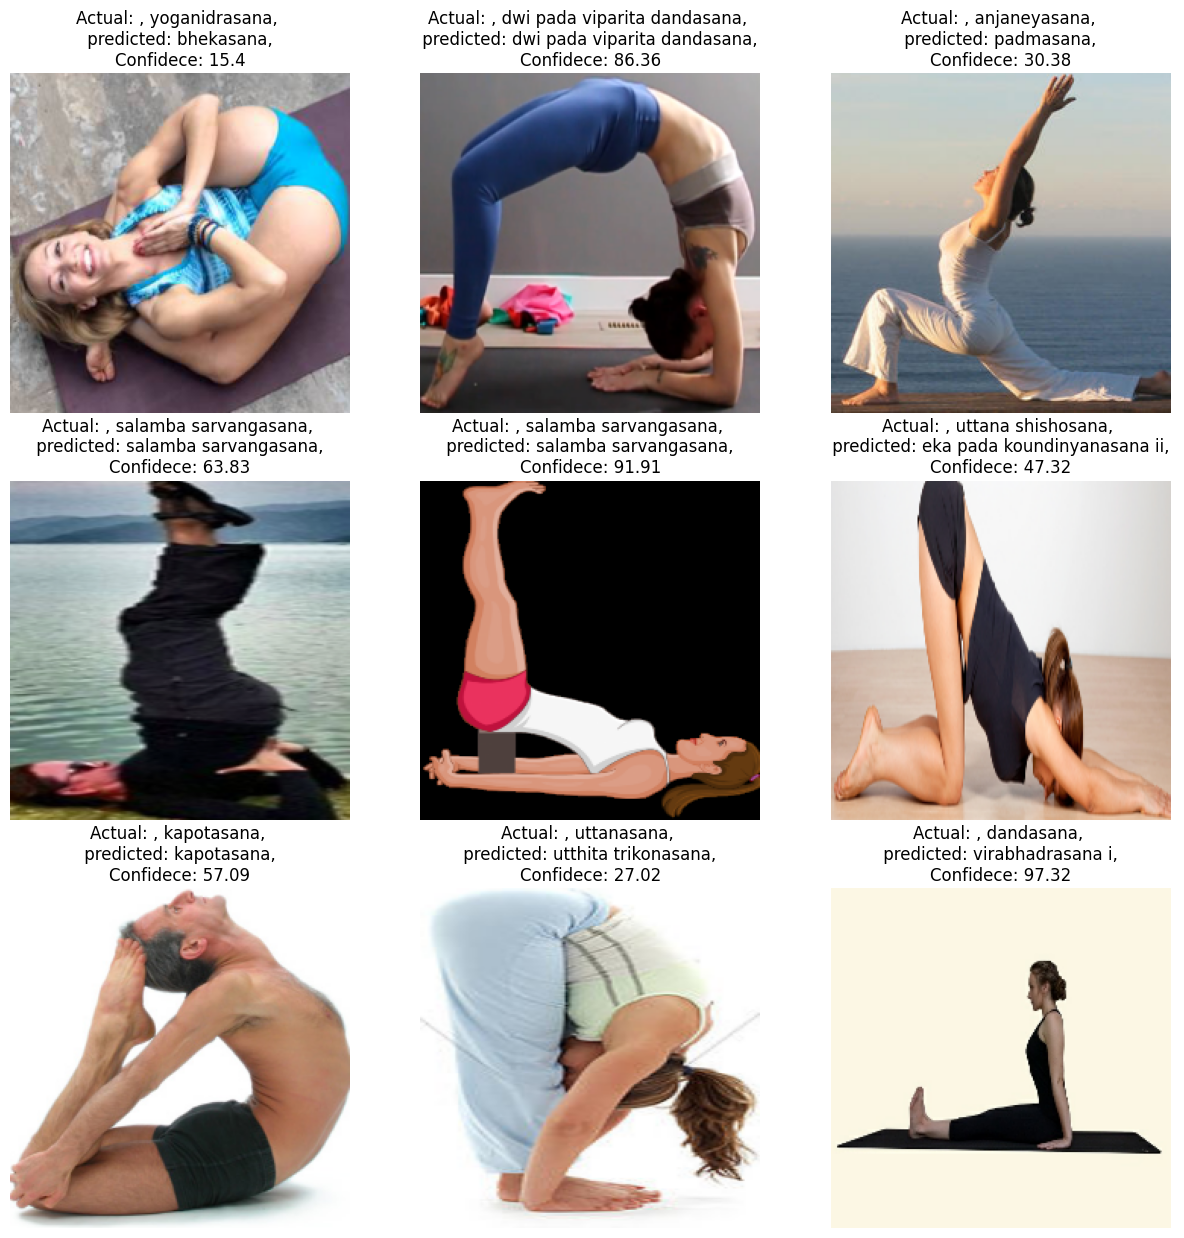

In [85]:
plt.figure(figsize=(15,15))
for images, lables in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8")) 
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[lables[i]]
        plt.title(f"Actual: , {actual_class}, \n predicted: {predicted_class}, \nConfidece: {confidence}")
        plt.axis('off')

In [78]:
import os
directory = "C:/Users/NITRO V/OneDrive/Documents"

In [ ]:

model_version = max([int(i) for i in os.listdir(directory)+[0]])+1
model.save(f"directory/{model_version}.keras")


In [80]:
import os

# Define the directory
directory = "C:/Users/NITRO V/OneDrive/Documents"

# Get a list of files and filter out non-integer filenames
files = [f for f in os.listdir(directory) if f.isdigit()]

# Convert filenames to integers and find the maximum
if files:
    model_version = max([int(f) for f in files]) + 1
else:
    model_version = 1  # Start from 1 if no numeric filenames are found

# Save the model with the new version number and a valid file extension
model.save(f"{directory}/{model_version}.keras")
